# Sommaire

1. ## Importation 
    - ## Importation de la librairie Pandas

2. ## Importation des 4 DataFrames

3. ## Nettoyage des 4 fichiers
    - ## Nettoyage du DataFrame "dispo_alimentaire"
    - ## Nettoyage du DataFrame "stabilité_politique"
    - ## Nettoyage du DataFrame "croissance_annuelle"
    - ## Nettoyage du DataFrame "stabilité_politique"

4. ## Jonction des DF
    - ## Jointure des "croissance_annuelle_pivot" et "stabilité_politique_pivot"
    - ## Jointure des "dispo_alim_pivot" et "population"
    - ## Création de 3 variables dérivées
    - ## Jointure des fichiers "df_merge" et "df_merged"


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1. Importation de la librairie Pandas"</h2>
</div>

In [43]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# Suppress FutureWarning messages
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Arrondir à deux décimales dans Python Pandas

pd.options.display.float_format = '{:.2f}'.format

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importation des 4 fichiers csv"</h2>
</div>

In [46]:
# Importation du fichier dispo alimentaire2017.csv

dispo_alimentaire = pd.read_csv("Data/DisponibiliteAlimentaire_2017.csv")

In [47]:
# Importation du fichier population_2000_2018.csv
# Année = 2017

population = pd.read_csv("Data/Population_2000_2018.csv")

In [48]:
# Importation du fichier croissance_annuelle.csv 
# Année = 2017

croissance_annuelle = pd.read_csv("Data/croissance_annuelle.csv")

In [49]:
# Importation du fichier stabilité_politique.csv
# Année = 2017

stabilité_politique = pd.read_csv("Data/stabilité_politique.csv")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3. Nettoyage des 4 DataFrames</h2>
</div>

### Nettoyage du DF croissance_annuelle

In [52]:
croissance_annuelle.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,19034.30,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,380851.44,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,13019.73,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,170096.99,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,3690849.15,X,Ciffre de sources internationales,NaN


In [53]:
croissance_annuelle["Produit"].value_counts()

Produit
Produit Intérieur Brut    211
Name: count, dtype: int64

In [54]:
croissance_annuelle.shape

(211, 15)

In [55]:
croissance_annuelle.dtypes

Code Domaine               object
Domaine                    object
Code zone (M49)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [56]:
croissance_annuelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            211 non-null    object 
 1   Domaine                 211 non-null    object 
 2   Code zone (M49)         211 non-null    int64  
 3   Zone                    211 non-null    object 
 4   Code Élément            211 non-null    int64  
 5   Élément                 211 non-null    object 
 6   Code Produit            211 non-null    int64  
 7   Produit                 211 non-null    object 
 8   Code année              211 non-null    int64  
 9   Année                   211 non-null    int64  
 10  Unité                   211 non-null    object 
 11  Valeur                  211 non-null    float64
 12  Symbole                 211 non-null    object 
 13  Description du Symbole  211 non-null    object 
 14  Note                    0 non-null      fl

In [57]:
# Vérification de valeurs nulles

croissance_annuelle.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      211
dtype: int64

In [58]:
# Modification pour ne garder que les colonnes utiles pour la suite

croissance_annuelle = croissance_annuelle[['Zone', 'Produit', 'Valeur']]

croissance_annuelle.head()

,Zone,Produit,Valeur
0,Afghanistan,Produit Intérieur Brut,19034.30
1,Afrique du Sud,Produit Intérieur Brut,380851.44
2,Albanie,Produit Intérieur Brut,13019.73
3,Algérie,Produit Intérieur Brut,170096.99
4,Allemagne,Produit Intérieur Brut,3690849.15


In [59]:
# Remodeler les données 

croissance_annuelle_pivot = pd.pivot(croissance_annuelle, index=['Zone'], columns=['Produit'], values=['Valeur'])

croissance_annuelle_pivot.head()

,Valeur
Produit,Produit Intérieur Brut
Zone,
Afghanistan,19034.30
Afrique du Sud,380851.44
Albanie,13019.73
Algérie,170096.99
Allemagne,3690849.15


In [60]:
# Renommer la colonne pour clarté

croissance_annuelle_pivot = croissance_annuelle_pivot.rename(columns={'Produit Intérieur Brut': 'croissance_annuelle'})

croissance_annuelle_pivot.head()

,Valeur
Produit,croissance_annuelle
Zone,
Afghanistan,19034.30
Afrique du Sud,380851.44
Albanie,13019.73
Algérie,170096.99
Allemagne,3690849.15


In [61]:
croissance_annuelle_pivot.isna().sum()

        Produit            
Valeur  croissance_annuelle    0
dtype: int64

### Nettoyage du fichier stabilité_politique

In [63]:
stabilité_politique.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-2.79,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.28,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.37,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.92,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.57,X,Ciffre de sources internationales,NaN


In [64]:
stabilité_politique.shape

(196, 15)

In [65]:
stabilité_politique.dtypes    

Code Domaine               object
Domaine                    object
Code zone (M49)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                     float64
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [66]:
# Vérification de valeurs nulles

stabilité_politique.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                     196
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      196
dtype: int64

In [67]:
# Modification pour ne garder que les colonnes utiles pour la suite

stabilité_politique = stabilité_politique[['Zone', 'Produit', 'Valeur']]

stabilité_politique.head()

,Zone,Produit,Valeur
0,Afghanistan,Stabilité politique et absence de violence/ter...,-2.79
1,Afrique du Sud,Stabilité politique et absence de violence/ter...,-0.28
2,Albanie,Stabilité politique et absence de violence/ter...,0.37
3,Algérie,Stabilité politique et absence de violence/ter...,-0.92
4,Allemagne,Stabilité politique et absence de violence/ter...,0.57


In [68]:
# Remodeler les données 

stabilité_politique_pivot = pd.pivot(stabilité_politique, index=['Zone'], columns=['Produit'], values=['Valeur'])

stabilité_politique_pivot.head()

,Valeur
Produit,Stabilité politique et absence de violence/terrorisme (indice)
Zone,
Afghanistan,-2.79
Afrique du Sud,-0.28
Albanie,0.37
Algérie,-0.92
Allemagne,0.57


In [69]:
# Renommer la colonne pour clarté

stabilité_politique_pivot = stabilité_politique_pivot.rename(columns={'Stabilité politique et absence de violence/terrorisme (indice)': 
                                                                      'Stabilité politique'})

stabilité_politique_pivot.head()

,Valeur
Produit,Stabilité politique
Zone,
Afghanistan,-2.79
Afrique du Sud,-0.28
Albanie,0.37
Algérie,-0.92
Allemagne,0.57


In [70]:
stabilité_politique_pivot.isna().sum()

        Produit            
Valeur  Stabilité politique    0
dtype: int64

### Nettoyage du DF dispo_alimentaire

In [72]:
#Afficher les 5 premières lignes de la table

dispo_alimentaire.head(50)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
5,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5521,Aliments pour animaux,2511,Blé et produits,2017,2017,Milliers de tonnes,76.00,S,Données standardisées
6,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5527,Semences,2511,Blé et produits,2017,2017,Milliers de tonnes,344.00,S,Données standardisées
7,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2511,Blé et produits,2017,2017,Milliers de tonnes,642.00,S,Données standardisées
8,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5170,Résidus,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
9,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2511,Blé et produits,2017,2017,Milliers de tonnes,5640.00,S,Données standardisées


In [73]:
# Dispo intérieure: Food availability refers to the physical presence and availability of nutritious and safe food at a specific location and time
# Vari_stock: Stock var: when the inventory management system has a recorded quantity of stock items that is incorrect to what is physically available
# Semences : Seeds
# Disponibilité alimentaire en quantité (kg/personne/an) :   Food availability in quantity (kg/person/year)
# Disponibilité alimentaire (Kcal/personne/jour)  :   Food availability (Kcal/person/day)
# Disponibilité de protéines en quantité (g/personne/jour):  Protein availability in quantity (g/person/day)
# Disponibilité de matière grasse en quantité (g/personne/jour) :   Availability of fat in quantity (g/person/day)

In [74]:
#Afficher les dimensions du dataset

dispo_alimentaire.shape

(176600, 14)

In [75]:
# Apprehender les datatypes des colonnes

dispo_alimentaire.dtypes    

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [76]:
# Afficher les valuers uniques dans Code Domaine

dispo_alimentaire["Code Domaine"].unique()

array(['FBS'], dtype=object)

In [77]:
# Afficher les valuers uniques dans Domaine

dispo_alimentaire["Domaine"].unique()

array(['Nouveaux Bilans Alimentaire'], dtype=object)

In [78]:
# Afficher les valuers uniques dans Code Zone

dispo_alimentaire["Code zone"].unique()

array([  2, 202,   3,   4,  79,   7,   8, 194,   9,   1,  10,  11,  52,
        12,  16,  14,  57, 255,  23,  53,  17,  19,  80,  20,  21,  26,
        27, 233,  35, 115,  32,  33,  40,  96, 128,  41, 214,  50,  44,
        46,  48, 107,  98,  49,  54,  72,  55,  59,  60, 225,  58, 203,
        63, 209, 231, 238, 185,  66,  67,  68,  74,  75,  73,  81,  84,
        86,  89,  90, 175,  91,  93,  95,  97,  25, 100, 101, 102, 103,
       104,  99, 105, 106, 109, 110, 112, 108, 114, 113,  83, 118, 122,
       119, 121, 123, 126, 256, 154, 129, 131, 130, 132, 133, 134, 143,
       137, 136, 138, 141, 273, 144,  28, 147, 149, 157, 158, 159, 162,
       153, 156, 221, 226, 235, 165, 166, 169, 150, 170, 171, 173,  70,
       174,  37, 117, 146, 120,  56, 116, 215, 183, 229, 184, 189, 188,
       191, 244, 193, 195, 272, 197, 199, 198, 276,  38, 210, 211, 207,
       208,  39, 167, 216, 176, 217, 220, 222, 213, 223, 230, 234, 155,
       236, 237, 249, 251, 181], dtype=int64)

In [79]:
# Afficher les valuers uniques dans Zone

dispo_alimentaire["Zone"].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bermudes', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Brunéi Darussalam',
       'Bulgarie', 'Burkina Faso', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba', 'Danemark',
       'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Espagne', 'Estonie',
       'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',
       'Gambie', 'Gé

In [80]:
# Afficher les valuers uniques dans Produit

dispo_alimentaire["Produit"].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [81]:
# Afficher les valeurs uniques dans Element

dispo_alimentaire["Élément"].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [82]:
# Afficher les valuers uniques dans Produit

dispo_alimentaire["Produit"].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [83]:
# Afficher les valuers uniques dans Code année

dispo_alimentaire["Code année"].unique()

array([2017], dtype=int64)

In [84]:
# Afficher les valuers uniques dans Code Année

dispo_alimentaire["Année"].unique()

array([2017], dtype=int64)

In [85]:
# Afficher les valuers uniques dans Unité

dispo_alimentaire["Unité"].unique()

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

In [86]:
# Afficher les valuers uniques dans Symbole

dispo_alimentaire["Symbole"].unique()

array(['S', 'Fc'], dtype=object)

In [87]:
# Afficher les valuers uniques dans Description du Symbole

dispo_alimentaire["Description du Symbole"].unique()

array(['Données standardisées', 'Donnée calculée'], dtype=object)

### Recherche des valeurs manquantes

In [89]:
# Dans chaque colonne

dispo_alimentaire.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [90]:
# Visualiser une valeur manquante par ligne

dispo_alimentaire.loc[dispo_alimentaire.isnull().any(axis=1)]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


### Recherche des doublons

In [92]:
dispo_alimentaire[dispo_alimentaire.duplicated()]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


In [93]:
# Alleger le DF en excluant les colonnes dont on n'a pas besoin

dispo_alimentaire = dispo_alimentaire[['Zone', 'Élément', 'Produit', 'Valeur']]
dispo_alimentaire.sample(5)

,Zone,Élément,Produit,Valeur
172202,Venezuela (République bolivarienne du),Alimentation pour touristes,Thé,0.00
42034,Côte d'Ivoire,Disponibilité alimentaire (Kcal/personne/jour),Huile Graines de Coton,23.00
56331,États-Unis d'Amérique,Disponibilité intérieure,Cephalopodes,206.00
22216,Bosnie-Herzégovine,Importations - Quantité,Edulcorants Autres,142.00
531,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,"Fruits, Autres",8.12


In [94]:
# Création d'une liste pour les valeurs Elements qu'on va garder

New_liste_Elements = ['Production', 'Importations - Quantité', 'Variation de stock', 'Exportations - Quantité', 
                      'Disponibilité intérieure', 'Nourriture', 'Disponibilité alimentaire en quantité (kg/personne/an)',
                      'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)']

In [95]:
# Ne garder que les éléments dans la liste dans le DF

dispo_alimentaire = dispo_alimentaire.loc[dispo_alimentaire['Élément'].isin(New_liste_Elements)]
dispo_alimentaire.head()

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,2302.00
2,Afghanistan,Variation de stock,Blé et produits,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.00


In [96]:
# Visualiser que les lignes où Produit est volailles puisque c'est ce qui nous interesse

dispo_alimentaire.loc[dispo_alimentaire['Produit'] == 'Viande de Volailles']

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.00
657,Afghanistan,Nourriture,Viande de Volailles,55.00
...,...,...,...,...
176391,Zimbabwe,Disponibilité intérieure,Viande de Volailles,76.00
176396,Zimbabwe,Nourriture,Viande de Volailles,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,16.00


In [97]:
# Mettre à jour le DF pour ne garder que les lignes où Produit == Viande de Volailles

dispo_alimentaire = dispo_alimentaire.loc[dispo_alimentaire['Produit'] == 'Viande de Volailles', :]
dispo_alimentaire

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.00
657,Afghanistan,Nourriture,Viande de Volailles,55.00
...,...,...,...,...
176391,Zimbabwe,Disponibilité intérieure,Viande de Volailles,76.00
176396,Zimbabwe,Nourriture,Viande de Volailles,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,16.00


In [98]:
# Remodeler le DF pour visualiser ce qu'on a dans la colonne Elément

dispo_alim_pivot = pd.pivot(dispo_alimentaire, index = ['Zone'], columns = ['Élément'], values = ['Valeur'])
dispo_alim_pivot

Valeur  \
Élément               Disponibilité alimentaire (Kcal/personne/jour)   
Zone                                                                   
Afghanistan                                                     5.00   
Afrique du Sud                                                143.00   
Albanie                                                        85.00   
Algérie                                                        22.00   
Allemagne                                                      71.00   
...                                                              ...   
Émirats arabes unis                                           147.00   
Équateur                                                       83.00   
États-Unis d'Amérique                                         219.00   
Éthiopie                                                        0.00   
Îles Salomon                                                   18.00   

                                                                              \
Élément               Disponibilité alimentaire en quantité (kg/personne/an)   
Zone                                                                           
Afghanistan                                                         1.53       
Afrique du Sud                                                     35.69       
Albanie                                                            16.36       
Algérie                                                             6.38       
Allemagne                                                          19.47       
...                                                                  ...       
Émirats arabes unis                                                43.47       
Équateur                                                           19.31       
États-Unis d'Amérique                                              55.68       
Éthiopie                                                            0.13       
Îles Salomon                                                        4.45       

                                                                                \
Élément               Disponibilité de protéines en quantité (g/personne/jour)   
Zone                                                                             
Afghanistan                                                         0.54         
Afrique du Sud                                                     14.11         
Albanie                                                             6.26         
Algérie                                                             1.97         
Allemagne                                                           7.96         
...                                                                  ...         
Émirats arabes unis                                                14.80         
Équateur                                                            6.15         
États-Unis d'Amérique                                              19.93         
Éthiopie                                                            0.04         
Îles Salomon                                                        1.51         

                                                                        \
Élément               Disponibilité intérieure Exportations - Quantité   
Zone                                                                     
Afghanistan                              57.00                     NaN   
Afrique du Sud                         2118.00                   63.00   
Albanie                                  47.00                    0.00   
Algérie                                 277.00                    0.00   
Allemagne                              1739.00                  646.00   
...                                        ...                     ...   
Émirats arabes unis                     412.00                   94.00   
Équateur                                341

In [99]:
# Suppression du niveau qui empêche la jointure

dispo_alim_pivot.columns = dispo_alim_pivot.columns.droplevel()

In [100]:
dispo_alim_pivot.isnull().sum()

Élément
Disponibilité alimentaire (Kcal/personne/jour)               0
Disponibilité alimentaire en quantité (kg/personne/an)       0
Disponibilité de protéines en quantité (g/personne/jour)     0
Disponibilité intérieure                                     2
Exportations - Quantité                                     37
Importations - Quantité                                      2
Nourriture                                                   2
Production                                                   4
Variation de stock                                           3
dtype: int64

On remarque qu'il y a 37 valeurs nulles dans la colonne "Exportations - Quantité", 2 dans "Disponibilité intérieure", 2 dans "Importations - Quantité", 
2 dans "Nourriture", 4 dans "Production et 3 dans "Variation de stock" 

[Lien pour le calcul] : (https://www.fao.org/4/X9892F/x9892f03.htm)

In [103]:
# Tentative de formule à l'aide de ce calcul : 

# "Exportations - Quantité" = "Production" + "importations - Quantité" - "Dispo alimentaire" + "variations des stocks" - "Dispo intérieure"

dispo_alim_pivot['Exportations - Quantité'] = dispo_alim_pivot.apply(lambda x : ((x['Production'] + x['Importations - Quantité'] - 
                                            x['Disponibilité alimentaire en quantité (kg/personne/an)'] + x['Variation de stock']) - 
                                            x['Disponibilité intérieure'])
                                            if pd.isnull(x['Exportations - Quantité']) 
                                                else x['Exportations - Quantité'], axis=1)

In [104]:
# Re-vérification si les valeurs NaN ont été remplacées par le calcul
# Nous constatons que ça a bien réduit les NaN

dispo_alim_pivot.isnull().sum()

Élément
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    2
Exportations - Quantité                                     4
Importations - Quantité                                     2
Nourriture                                                  2
Production                                                  4
Variation de stock                                          3
dtype: int64

In [105]:
# Vérification des valeurs nulles, elles seront traitées plus tard

dispo_alim_pivot[dispo_alim_pivot.isna().any(axis=1)]

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
Zone,,,,,,,,,
Djibouti,9.00,2.68,0.92,3.00,NaN,3.00,3.00,NaN,0.00
Maldives,47.00,13.50,4.70,12.00,NaN,12.00,7.00,NaN,0.00
Ouzbékistan,6.00,1.96,0.63,NaN,NaN,NaN,NaN,NaN,NaN
Pérou,62.00,13.47,6.71,1523.00,1.00,60.00,424.00,1465.00,NaN
République démocratique populaire lao,41.00,10.91,3.59,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
dispo_alim_pivot.describe()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
count,172.00,172.00,172.00,170.00,168.00,170.00,170.00,168.00,169.00
mean,74.56,20.21,7.12,687.59,104.55,89.53,657.05,725.19,13.67
std,60.57,15.86,5.60,2187.18,463.74,186.67,2136.55,2501.46,75.36
min,0.00,0.13,0.04,2.00,-70.31,0.00,2.00,0.00,-119.00
25%,22.00,6.44,2.17,30.50,0.00,3.00,28.50,13.75,0.00
50%,64.00,18.09,6.50,100.00,1.00,16.00,99.50,70.00,0.00
75%,105.50,30.04,10.37,368.25,16.60,81.25,365.25,409.75,7.00
max,243.00,72.31,27.87,18266.00,4223.00,1069.00,18100.00,21914.00,859.00


In [107]:
# Visualiser des pays avec une très grande quantité d'exportations

display(dispo_alim_pivot.sort_values(by='Exportations - Quantité', ascending=False))

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
Zone,,,,,,,,,
Brésil,204.00,48.03,15.68,9982.00,4223.00,3.00,9982.00,14201.00,0.00
États-Unis d'Amérique,219.00,55.68,19.93,18266.00,3692.00,123.00,18100.00,21914.00,80.00
Pays-Bas,70.00,20.33,8.48,372.00,1418.00,608.00,346.00,1100.00,-82.00
Pologne,107.00,30.30,12.14,1156.00,1025.00,55.00,1150.00,2351.00,225.00
Thaïlande,47.00,12.95,4.35,881.00,796.00,2.00,896.00,1676.00,1.00
...,...,...,...,...,...,...,...,...,...
Saint-Vincent-et-les Grenadines,243.00,72.31,25.10,8.00,-70.31,9.00,8.00,0.00,1.00
Djibouti,9.00,2.68,0.92,3.00,NaN,3.00,3.00,NaN,0.00
Maldives,47.00,13.50,4.70,12.00,NaN,12.00,7.00,NaN,0.00


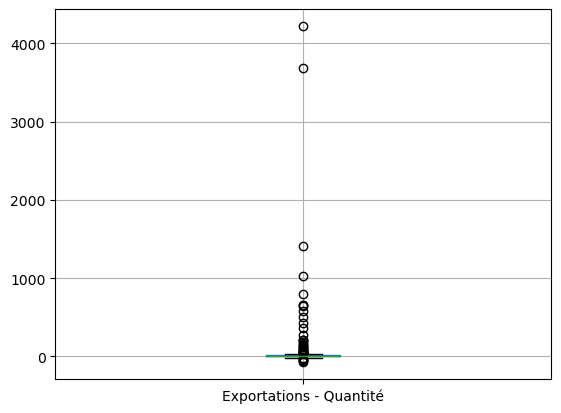

In [108]:
# Re-confirmer la distribution de la colonne "Exportations - Quantité" pour voir les outliers

dispo_alim_pivot.boxplot(column='Exportations - Quantité')
plt.show()

In [109]:
# Il y a des pays qui ont des valeurs aberrantes comme Les Etats-Unis, Brésil, Chine et Inde

In [110]:
dispo_alim_pivot.isna().sum()

Élément
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    2
Exportations - Quantité                                     4
Importations - Quantité                                     2
Nourriture                                                  2
Production                                                  4
Variation de stock                                          3
dtype: int64

In [111]:
dispo_alimentaire

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.00
657,Afghanistan,Nourriture,Viande de Volailles,55.00
...,...,...,...,...
176391,Zimbabwe,Disponibilité intérieure,Viande de Volailles,76.00
176396,Zimbabwe,Nourriture,Viande de Volailles,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,16.00


### Nettoyage du DF population

In [113]:
# Afficher les 5 premières lignes de la table

population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.95,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.99,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.77,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.87,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.68,X,Sources internationales sûres,NaN


In [114]:
#Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 4411 observation(s) ou article(s)
Le tableau comporte 15 colonne(s)


In [115]:
# Apprehender les datatypes des colonnes

population.dtypes   

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

In [116]:
population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.00,4411.00,4411.00,4411.00,4411.00,4411.00
mean,132.20,511.00,3010.00,2009.07,2009.07,29630.04
std,75.85,0.00,0.00,5.48,5.48,123802.86
min,1.00,511.00,3010.00,2000.00,2000.00,0.79
25%,68.00,511.00,3010.00,2004.00,2004.00,392.19
50%,132.00,511.00,3010.00,2009.00,2009.00,4764.74
75%,195.00,511.00,3010.00,2014.00,2014.00,18215.48
max,299.00,511.00,3010.00,2018.00,2018.00,1427647.79


In [117]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [118]:
# Convertir le datatype de la colonne Valeur en int

population['Valeur'] = population['Valeur'].astype(int)

In [119]:
# Re-vérifier si la colonne a été convertie en int

In [120]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code Domaine            4411 non-null   object
 1   Domaine                 4411 non-null   object
 2   Code zone               4411 non-null   int64 
 3   Zone                    4411 non-null   object
 4   Code Élément            4411 non-null   int64 
 5   Élément                 4411 non-null   object
 6   Code Produit            4411 non-null   int64 
 7   Produit                 4411 non-null   object
 8   Code année              4411 non-null   int64 
 9   Année                   4411 non-null   int64 
 10  Unité                   4411 non-null   object
 11  Valeur                  4411 non-null   int32 
 12  Symbole                 4411 non-null   object
 13  Description du Symbole  4411 non-null   object
 14  Note                    258 non-null    object
dtypes: i

In [121]:
# Rechercher des valeurs manquantes

population.isnull().sum() 

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [122]:
#Afficher les valeurs distinctes de la colonne Note

population["Note"].unique() 

array([nan,
       'UNDESA, Population Division – World Population Prospects, the 2017 Revision'],
      dtype=object)

In [123]:
# Filtrer le DF pour ne garder que la population 2017 pour être en harmonie avec le DF dispo_alimentaire

population = population.loc[population['Année'] == 2017, :]
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658,X,Sources internationales sûres,NaN


In [124]:
# Ne garder que les deux colonnes utiles 

population = population[['Zone', 'Valeur']]

In [125]:
# Changement du nom de la colonne Valeur par Population

population.rename(columns= {"Valeur": "Population"}, inplace=True)

In [126]:
# Changement du datatype de la colonne Population en int

population['Population'] = population['Population'].astype('int64')

In [127]:
# Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000

population["Population"] = population["Population"].apply(lambda v : v * 1000)

In [128]:
population.head()

,Zone,Population
17,Afghanistan,36296000
36,Afrique du Sud,57009000
55,Albanie,2884000
74,Algérie,41389000
93,Allemagne,82658000


In [129]:
# On ne garde que les pays et le nombre de population dans le scope du projet

In [130]:
population = population[['Zone', 'Population']]
population 

,Zone,Population
17,Afghanistan,36296000
36,Afrique du Sud,57009000
55,Albanie,2884000
74,Algérie,41389000
93,Allemagne,82658000
...,...,...
4333,Venezuela (République bolivarienne du),29402000
4352,Viet Nam,94600000
4371,Yémen,27834000
4390,Zambie,16853000


In [131]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 17 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Zone        236 non-null    object
 1   Population  236 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.5+ KB


In [132]:
# Vérification des valeurs maximum pour la population pour éviter les outliers

display(population.sort_values(by='Population', ascending=False))

,Zone,Population
823,"Chine, continentale",1421021000
1952,Inde,1338676000
1230,États-Unis d'Amérique,325084000
1971,Indonésie,264650000
3029,Pakistan,207906000
...,...,...
2725,Montserrat,4000
1781,Îles Falkland (Malvinas),3000
4143,Tokélaou,1000
2896,Nioué,1000


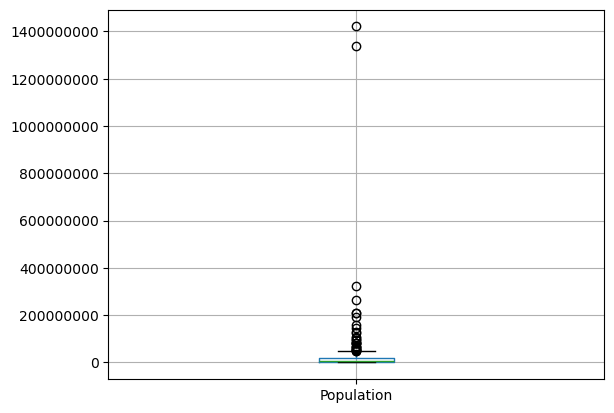

In [133]:
# Regarder la disribution de la Population

population.boxplot(column='Population')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [134]:
# Visualisation des pays Flop 10 en population

display(population.sort_values(by='Population', ascending = True).head(20))

,Zone,Population
3672,Saint-Siège,0
2896,Nioué,1000
4143,Tokélaou,1000
1781,Îles Falkland (Malvinas),3000
2725,Montserrat,4000
3653,Saint-Pierre-et-Miquelon,5000
3569,"Sainte-Hélène, Ascension et Tristan da Cunha",6000
3550,Saint-Barthélemy,9000
2801,Nauru,10000
4257,Tuvalu,11000


In [135]:
# Après une première réflexion, il a été décidé de ne pas répertorier les pays ayant moins de 25 000 habitants

population = population.loc[population['Population'] > 250000, :]

In [136]:
population.isna().sum()

Zone          0
Population    0
dtype: int64

In [137]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 17 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Zone        187 non-null    object
 1   Population  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4. Jonction des fichiers</h2>
</div>

### Jonction des croissance_annuelle_pivot et stabilité_politique_pivot

In [140]:
df_merge = pd.merge(croissance_annuelle_pivot, stabilité_politique_pivot, on='Zone', how='inner')

In [141]:
df_merge

Valeur                    
Produit               croissance_annuelle Stabilité politique
Zone                                                         
Afghanistan                      19034.30               -2.79
Afrique du Sud                  380851.44               -0.28
Albanie                          13019.73                0.37
Algérie                         170096.99               -0.92
Allemagne                      3690849.15                0.57
...                                   ...                 ...
Érythrée                          1903.97               -0.73
États-Unis d'Amérique         19612100.00                0.26
Éthiopie                         76794.69               -1.68
Îles Marshall                      212.70                1.03
Îles Salomon                      1469.79                0.19

[195 rows x 2 columns]

In [142]:
# Supprimer les Pays avec Nan du DataFrame final

#df_merge.dropna(inplace=True)

In [143]:
df_merge

Valeur                    
Produit               croissance_annuelle Stabilité politique
Zone                                                         
Afghanistan                      19034.30               -2.79
Afrique du Sud                  380851.44               -0.28
Albanie                          13019.73                0.37
Algérie                         170096.99               -0.92
Allemagne                      3690849.15                0.57
...                                   ...                 ...
Érythrée                          1903.97               -0.73
États-Unis d'Amérique         19612100.00                0.26
Éthiopie                         76794.69               -1.68
Îles Marshall                      212.70                1.03
Îles Salomon                      1469.79                0.19

[195 rows x 2 columns]

In [144]:
# Supprimer le niveau qui risque d'empêcher la jointure

df_merge.columns = df_merge.columns.droplevel()

In [145]:
df_merge.shape

(195, 2)

In [146]:
df_merge.isna().sum()

Produit
croissance_annuelle    0
Stabilité politique    0
dtype: int64

### Jonction des "dispo_alim_pivot" et "population"

In [148]:
df_merged = pd.merge(dispo_alim_pivot, population, on='Zone', how='inner')

In [149]:
df_merged

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population
0,Afghanistan,5.00,1.53,0.54,57.00,-1.53,29.00,55.00,28.00,0.00,36296000
1,Afrique du Sud,143.00,35.69,14.11,2118.00,63.00,514.00,2035.00,1667.00,-0.00,57009000
2,Albanie,85.00,16.36,6.26,47.00,0.00,38.00,47.00,13.00,4.00,2884000
3,Algérie,22.00,6.38,1.97,277.00,0.00,2.00,264.00,275.00,0.00,41389000
4,Allemagne,71.00,19.47,7.96,1739.00,646.00,842.00,1609.00,1514.00,-29.00,82658000
...,...,...,...,...,...,...,...,...,...,...,...
158,Émirats arabes unis,147.00,43.47,14.80,412.00,94.00,433.00,412.00,48.00,-26.00,9487000
159,Équateur,83.00,19.31,6.15,341.00,0.00,0.00,324.00,340.00,-1.00,16785000
160,États-Unis d'Amérique,219.00,55.68,19.93,18266.00,3692.00,123.00,18100.00,21914.00,80.00,325084000
161,Éthiopie,0.00,0.13,0.04,14.00,0.87,1.00,14.00,14.00,0.00,106399000


In [150]:
df_merged.isna().sum()

Zone                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    2
Exportations - Quantité                                     4
Importations - Quantité                                     2
Nourriture                                                  2
Production                                                  4
Variation de stock                                          3
Population                                                  0
dtype: int64

In [151]:
# Nous allons harmoniser les unités. variables sont en millier de tonnes. on convertit en Kg. 
# Pour cela, nous avons décidé de multiplier la population par 1000

df_merged["Production"] = df_merged["Production"].apply(lambda v : v * 1000)

df_merged["Disponibilité intérieure"] = df_merged["Disponibilité intérieure"].apply(lambda v : v * 1000)

df_merged["Exportations - Quantité"] = df_merged["Exportations - Quantité"].apply(lambda v : v * 1000)

df_merged["Importations - Quantité"] = df_merged["Exportations - Quantité"].apply(lambda v : v * 1000)

df_merged["Nourriture"] = df_merged["Nourriture"].apply(lambda v : v * 1000)

In [152]:
df_merged

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population
0,Afghanistan,5.00,1.53,0.54,57000.00,-1530.00,-1530000.00,55000.00,28000.00,0.00,36296000
1,Afrique du Sud,143.00,35.69,14.11,2118000.00,63000.00,63000000.00,2035000.00,1667000.00,-0.00,57009000
2,Albanie,85.00,16.36,6.26,47000.00,0.00,0.00,47000.00,13000.00,4.00,2884000
3,Algérie,22.00,6.38,1.97,277000.00,0.00,0.00,264000.00,275000.00,0.00,41389000
4,Allemagne,71.00,19.47,7.96,1739000.00,646000.00,646000000.00,1609000.00,1514000.00,-29.00,82658000
...,...,...,...,...,...,...,...,...,...,...,...
158,Émirats arabes unis,147.00,43.47,14.80,412000.00,94000.00,94000000.00,412000.00,48000.00,-26.00,9487000
159,Équateur,83.00,19.31,6.15,341000.00,0.00,0.00,324000.00,340000.00,-1.00,16785000
160,États-Unis d'Amérique,219.00,55.68,19.93,18266000.00,3692000.00,3692000000.00,18100000.00,21914000.00,80.00,325084000
161,Éthiopie,0.00,0.13,0.04,14000.00,870.00,870000.00,14000.00,14000.00,0.00,106399000


### Création de 3 nouvelles variables 

In [154]:
df_merged["Prod_moyenne_par_personne"] = (df_merged["Production"] / df_merged["Population"])

df_merged["Dispo_int_par_personne"] = (df_merged["Disponibilité intérieure"] / df_merged["Population"])

df_merged["Nourriture_par_personne"] = (df_merged["Nourriture"] / df_merged["Population"])

In [155]:
# Modification du df_final pour ne garder que des colonnes utiles : La variable Variation de stock ne nous donne pas beaucoup d'information

df_merged = df_merged[['Zone','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de protéines en quantité (g/personne/jour)',
                     'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Prod_moyenne_par_personne', 'Production', 
                     'Dispo_int_par_personne', 'Nourriture_par_personne', 'Population']]

In [156]:
df_merged

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Prod_moyenne_par_personne,Production,Dispo_int_par_personne,Nourriture_par_personne,Population
0,Afghanistan,1.53,0.54,57000.00,-1530.00,-1530000.00,0.00,28000.00,0.00,0.00,36296000
1,Afrique du Sud,35.69,14.11,2118000.00,63000.00,63000000.00,0.03,1667000.00,0.04,0.04,57009000
2,Albanie,16.36,6.26,47000.00,0.00,0.00,0.00,13000.00,0.02,0.02,2884000
3,Algérie,6.38,1.97,277000.00,0.00,0.00,0.01,275000.00,0.01,0.01,41389000
4,Allemagne,19.47,7.96,1739000.00,646000.00,646000000.00,0.02,1514000.00,0.02,0.02,82658000
...,...,...,...,...,...,...,...,...,...,...,...
158,Émirats arabes unis,43.47,14.80,412000.00,94000.00,94000000.00,0.01,48000.00,0.04,0.04,9487000
159,Équateur,19.31,6.15,341000.00,0.00,0.00,0.02,340000.00,0.02,0.02,16785000
160,États-Unis d'Amérique,55.68,19.93,18266000.00,3692000.00,3692000000.00,0.07,21914000.00,0.06,0.06,325084000
161,Éthiopie,0.13,0.04,14000.00,870.00,870000.00,0.00,14000.00,0.00,0.00,106399000


Dans la jointure, on remarque qu'il y a des lignes pays en NaN. Il faut les mettre à part puis supprimer!

In [158]:
# Mettre les lignes avec des Nan dans un autre DataFrame 

filtre_pays_NaN = (df_merged.isnull().any(axis=1))

Pays_avec_Nan = df_merged.loc[filtre_pays_NaN]
Pays_avec_Nan

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Prod_moyenne_par_personne,Production,Dispo_int_par_personne,Nourriture_par_personne,Population
42,Djibouti,2.68,0.92,3000.00,NaN,NaN,NaN,NaN,0.00,0.00,944000
88,Maldives,13.50,4.70,12000.00,NaN,NaN,NaN,NaN,0.02,0.01,496000
109,Ouzbékistan,1.96,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31959000
126,République démocratique populaire lao,10.91,3.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6953000


In [159]:
# Sauvegarder les pays avec des Nan 

Pays_avec_Nan.to_csv('Data/Pays_avec_Nan.csv')

In [160]:
# Supprimer les Pays avec Nan du DataFrame final

df_merged.dropna(inplace=True)

### Jointure des fichiers "df_merge" et "df_merged"

In [162]:
# Visualisation du df_final pour vérification de la suppression

df_final = pd.merge(df_merge, df_merged, on='Zone', how='outer')

In [163]:
df_final

,Zone,croissance_annuelle,Stabilité politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Prod_moyenne_par_personne,Production,Dispo_int_par_personne,Nourriture_par_personne,Population
0,Afghanistan,19034.30,-2.79,1.53,0.54,57000.00,-1530.00,-1530000.00,0.00,28000.00,0.00,0.00,36296000.00
1,Afrique du Sud,380851.44,-0.28,35.69,14.11,2118000.00,63000.00,63000000.00,0.03,1667000.00,0.04,0.04,57009000.00
2,Albanie,13019.73,0.37,16.36,6.26,47000.00,0.00,0.00,0.00,13000.00,0.02,0.02,2884000.00
3,Algérie,170096.99,-0.92,6.38,1.97,277000.00,0.00,0.00,0.01,275000.00,0.01,0.01,41389000.00
4,Allemagne,3690849.15,0.57,19.47,7.96,1739000.00,646000.00,646000000.00,0.02,1514000.00,0.02,0.02,82658000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Érythrée,1903.97,-0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,États-Unis d'Amérique,19612100.00,0.26,55.68,19.93,18266000.00,3692000.00,3692000000.00,0.07,21914000.00,0.06,0.06,325084000.00
198,Éthiopie,76794.69,-1.68,0.13,0.04,14000.00,870.00,870000.00,0.00,14000.00,0.00,0.00,106399000.00
199,Îles Marshall,212.70,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# Remplacer les inf du DataFrame par Nan

df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

In [165]:
# Supprimer les NaN

df_final.dropna(inplace=True)

In [166]:
df_final

,Zone,croissance_annuelle,Stabilité politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Prod_moyenne_par_personne,Production,Dispo_int_par_personne,Nourriture_par_personne,Population
0,Afghanistan,19034.30,-2.79,1.53,0.54,57000.00,-1530.00,-1530000.00,0.00,28000.00,0.00,0.00,36296000.00
1,Afrique du Sud,380851.44,-0.28,35.69,14.11,2118000.00,63000.00,63000000.00,0.03,1667000.00,0.04,0.04,57009000.00
2,Albanie,13019.73,0.37,16.36,6.26,47000.00,0.00,0.00,0.00,13000.00,0.02,0.02,2884000.00
3,Algérie,170096.99,-0.92,6.38,1.97,277000.00,0.00,0.00,0.01,275000.00,0.01,0.01,41389000.00
4,Allemagne,3690849.15,0.57,19.47,7.96,1739000.00,646000.00,646000000.00,0.02,1514000.00,0.02,0.02,82658000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Émirats arabes unis,390516.80,0.60,43.47,14.80,412000.00,94000.00,94000000.00,0.01,48000.00,0.04,0.04,9487000.00
195,Équateur,104295.86,-0.08,19.31,6.15,341000.00,0.00,0.00,0.02,340000.00,0.02,0.02,16785000.00
197,États-Unis d'Amérique,19612100.00,0.26,55.68,19.93,18266000.00,3692000.00,3692000000.00,0.07,21914000.00,0.06,0.06,325084000.00
198,Éthiopie,76794.69,-1.68,0.13,0.04,14000.00,870.00,870000.00,0.00,14000.00,0.00,0.00,106399000.00


In [167]:
df_final.isna().sum()

Zone                                                        0
croissance_annuelle                                         0
Stabilité politique                                         0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    0
Exportations - Quantité                                     0
Importations - Quantité                                     0
Prod_moyenne_par_personne                                   0
Production                                                  0
Dispo_int_par_personne                                      0
Nourriture_par_personne                                     0
Population                                                  0
dtype: int64

In [168]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 0 to 200
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      153 non-null    object 
 1   croissance_annuelle                                       153 non-null    float64
 2   Stabilité politique                                       153 non-null    float64
 3   Disponibilité alimentaire en quantité (kg/personne/an)    153 non-null    float64
 4   Disponibilité de protéines en quantité (g/personne/jour)  153 non-null    float64
 5   Disponibilité intérieure                                  153 non-null    float64
 6   Exportations - Quantité                                   153 non-null    float64
 7   Importations - Quantité                                   153 non-null    float64
 8   Prod_moyenne_par_personne

In [169]:
# Sauvegarder le df_final dans le dossier original

df_final.to_csv('Data/df_final.csv')